In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Haberman's Survival Data
- 

In [10]:
dataset = pd.read_csv('Data/haberman.csv')

In [11]:
dataset.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [12]:
dataset.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [17]:
data = dataset.rename(columns={'30':"Age", '64':"OP_Year", '1':"axil_nodes",'1.1':"Surv_status"})

In [19]:
data.head()

,Age,OP_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [20]:
data.columns

Index(['Age', 'OP_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          305 non-null    int64
 1   OP_Year      305 non-null    int64
 2   axil_nodes   305 non-null    int64
 3   Surv_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [23]:
data.shape

(305, 4)

In [24]:
data["Surv_status"].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

In [28]:
data.describe()

,Age,OP_Year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


- the idea is, we are given the age of a patients at the year were they did the operation and the number of positive axillary detected in patients
## objective: 
#### the objective is to identify the survival status of a new paintes base on the above 3 featuers
- 1: mean that the patients survive 5years or more
- 2: mean that the patients survive less then 5 years or died in 5 years

In [38]:
safe_p = data.loc[data["Surv_status"] == 1]
not_safe_p = data.loc[data['Surv_status'] == 2]

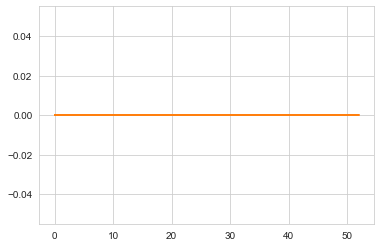

In [45]:
plt.plot(safe_p["axil_nodes"], np.zeros_like(safe_p['Age']))
plt.plot(not_safe_p["axil_nodes"], np.zeros_like(not_safe_p["Age"]))

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


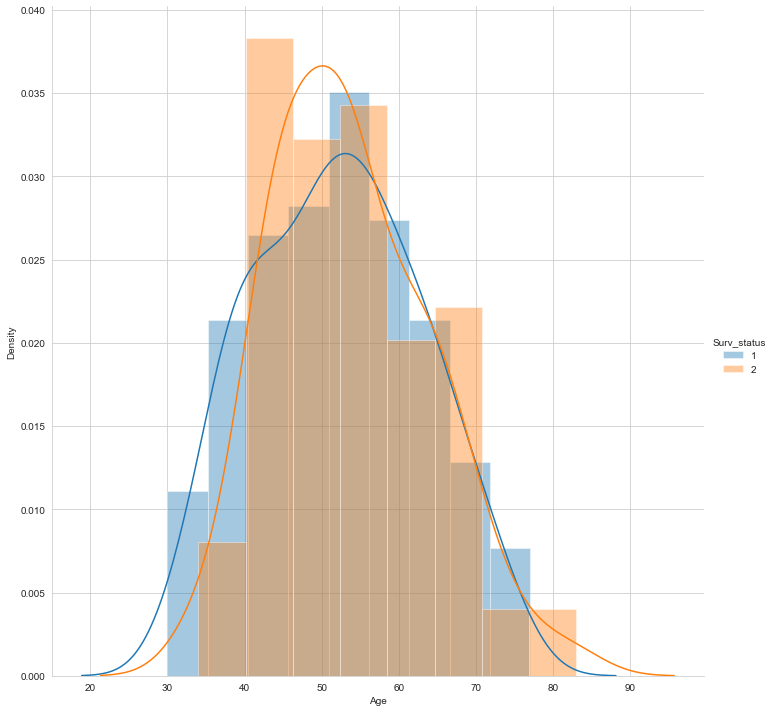

In [66]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Surv_status", height=10).map(sns.distplot, "Age").add_legend()
plt.show()


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


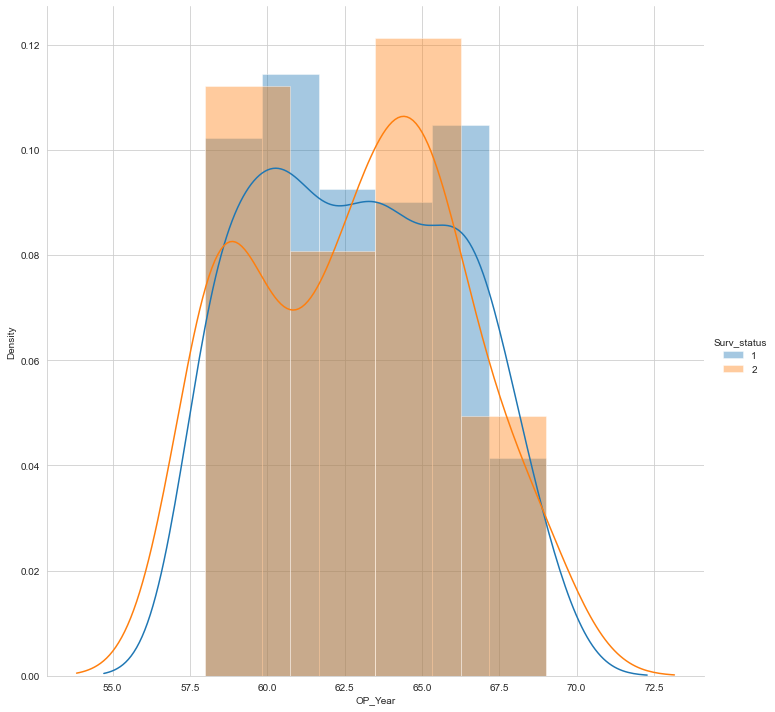

In [67]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Surv_status", height=10).map(sns.distplot, "OP_Year").add_legend()
plt.show()

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


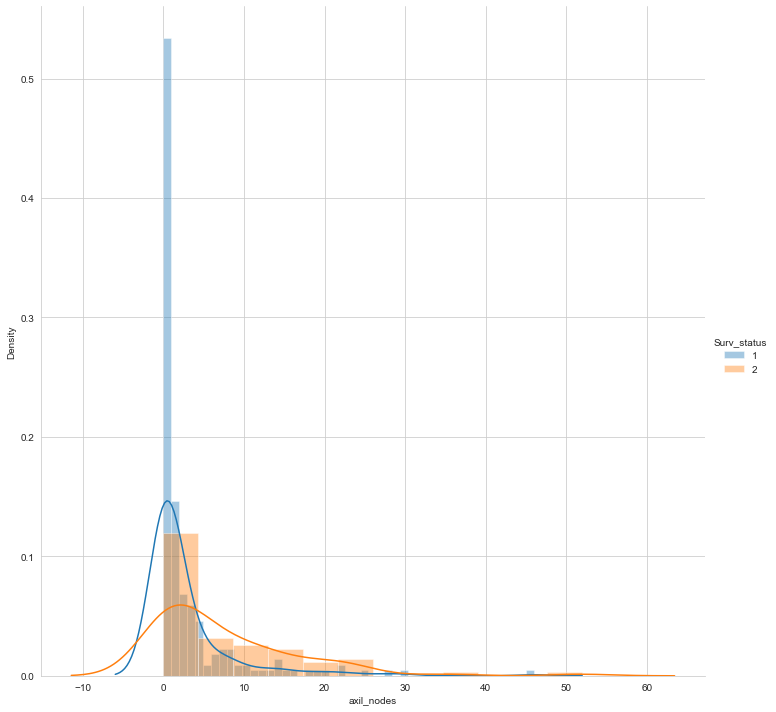

In [68]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Surv_status", height=10).map(sns.distplot, 'axil_nodes').add_legend()
plt.show()

- if the positive axil_nodes are detected between 0-1 we can see that most of them are survived, like 90%
- if the positive axil_nodes are detected between 2-3 we can say that 60% survi
- if the positive axil_nodes are detected between 3-4 we can say that 30% survi and 70% couldnt
- ....

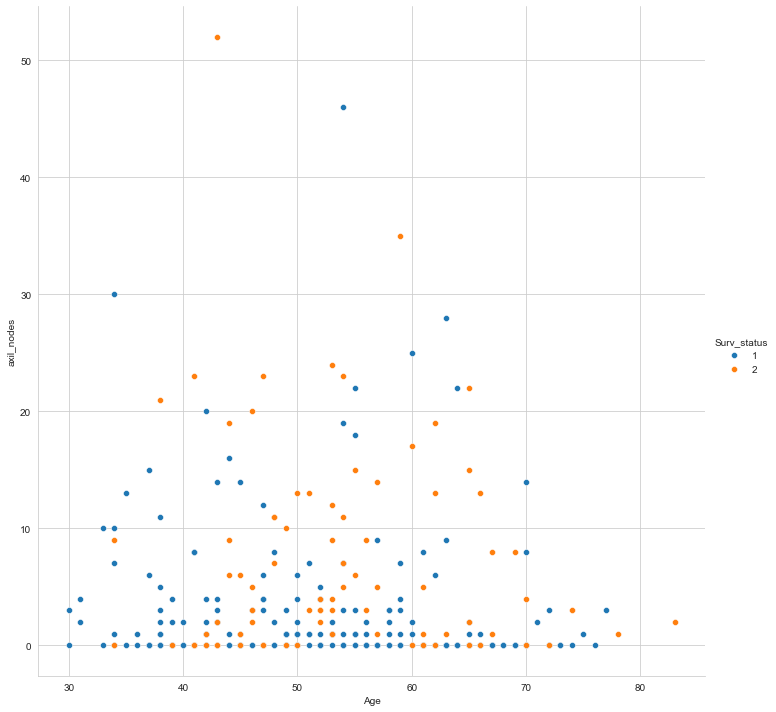

In [75]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Surv_status", height=10).map(sns.scatterplot, "Age", "axil_nodes").add_legend()
plt.show()

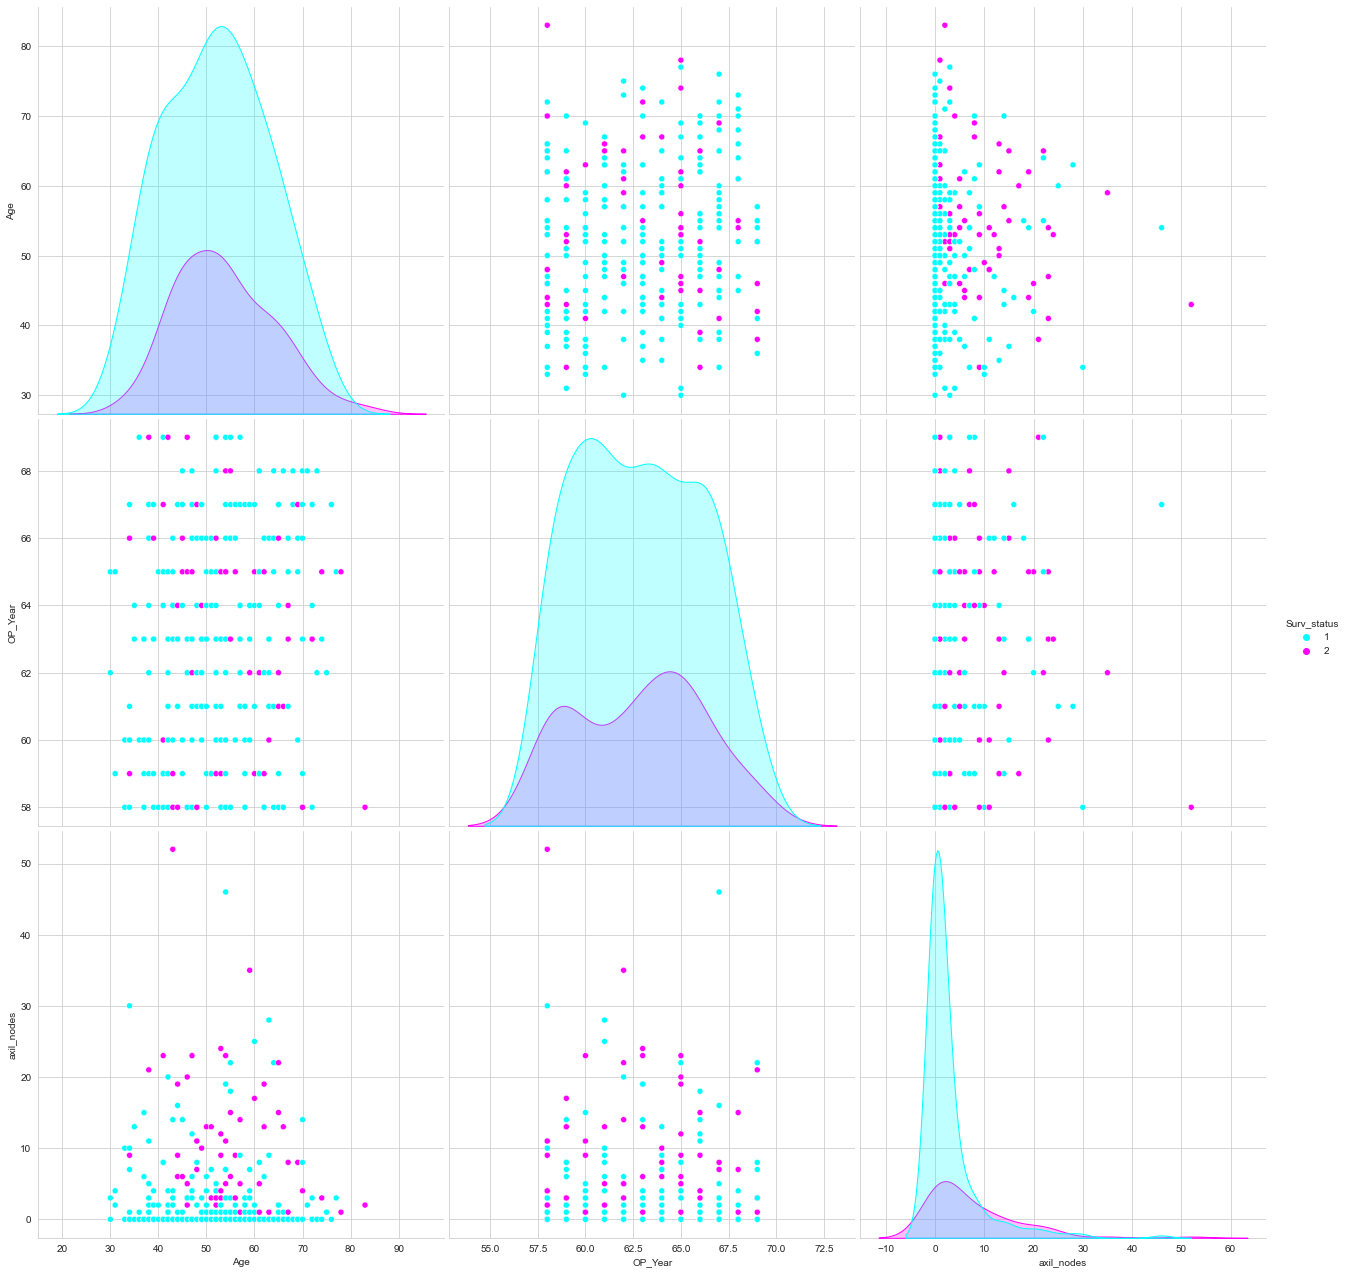

In [94]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="Surv_status", palette='cool', height=6)
plt.show()

- we can make the assumptions on these two featuers: Age and axil_nodes
- if the axil_nodes detect 0-5 positive nodes the chanses of survivel is higher around 90-95%
- if the age is between 30-48 and axil_nodes could be any, still the surivel is higher around 98-99%
- if the age is between 49-60 and the axil_nodes are >= 3 the survial rate is less 
- if the age is between 60-70 and the axi_nodes are > 10 the sruvial rate is less